In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
multip = pd.read_parquet("multip_interp.parquet")
multip

,value
timestamp,
2021-06-26 00:00:00,0.000000
2021-06-26 00:02:00,0.000000
2021-06-26 00:04:00,0.000000
2021-06-26 00:06:00,0.000000
2021-06-26 00:08:00,0.000000
...,...
2021-06-26 23:50:00,0.085874
2021-06-26 23:52:00,0.040897
2021-06-26 23:54:00,0.007493


In [3]:
naive = pd.read_parquet("multip_interp_near.parquet")
naive

,value
timestamp,
2021-06-26 00:00:00,0.000000
2021-06-26 00:02:00,0.000000
2021-06-26 00:04:00,0.000000
2021-06-26 00:06:00,0.000000
2021-06-26 00:08:00,0.000000
...,...
2021-06-26 23:50:00,0.084865
2021-06-26 23:52:00,0.039603
2021-06-26 23:54:00,0.006963


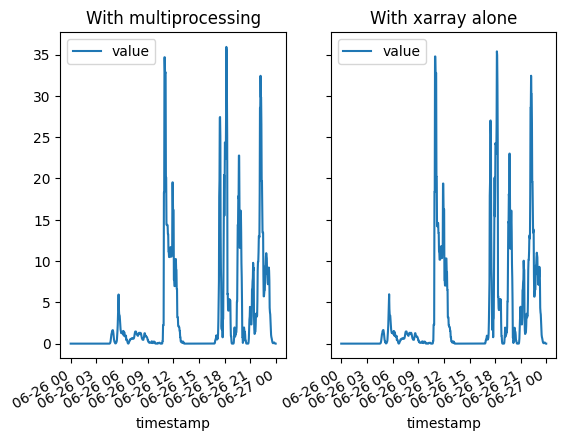

In [4]:
fig, (lax, rax) = plt.subplots(1, 2, sharex=True, sharey=True)
multip.plot(ax=lax, title="With multiprocessing")
naive.plot(ax=rax, title="With xarray alone")
plt.show()

In [6]:
df = pd.concat([naive, multip], axis="index")
df = naive.join(multip, lsuffix="NAIVE", rsuffix="CRAZY")
df

,valueNAIVE,valueCRAZY
timestamp,,
2021-06-26 00:00:00,0.000000,0.000000
2021-06-26 00:02:00,0.000000,0.000000
2021-06-26 00:04:00,0.000000,0.000000
2021-06-26 00:06:00,0.000000,0.000000
2021-06-26 00:08:00,0.000000,0.000000
...,...,...
2021-06-26 23:50:00,0.084865,0.085874
2021-06-26 23:52:00,0.039603,0.040897
2021-06-26 23:54:00,0.006963,0.007493


In [12]:
df.corr()

,valueNAIVE,valueCRAZY
valueNAIVE,1.000000,0.999907
valueCRAZY,0.999907,1.000000


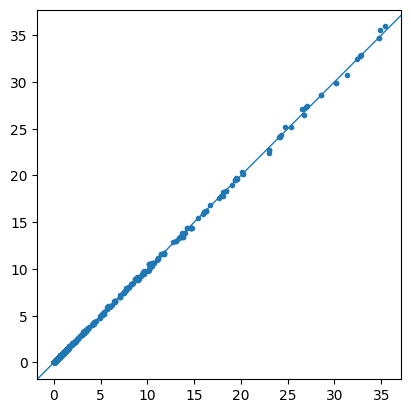

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.scatter("valueNAIVE", "valueCRAZY", data=df, marker=".")
ax.axline([0, 0], slope=1, lw=1, zorder=0)
plt.show()